In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randrange

## 1 Decision Trees for Classification

**Generating Data**

In [3]:
def generate_data(size,sd):
    Xdata = []
    for i in range(size): #Amount of data points
        point = []
        for j in range(15): #X1 to X15
            temp = np.random.binomial(1,0.5,1)[0] #50% chance of 0 or 1
            if temp == 0:
                temp = -1
            point.append(temp)
        Xdata.append(point)
    Ydata = []
    for i in range(size): #Finding value of Y for each data point
        one = Xdata[i][0] * 0.9
        two = Xdata[i][1] * 0.81
        three = Xdata[i][2] * 0.729
        four = Xdata[i][3] * 0.6561
        five = Xdata[i][4] * 0.59049
        en = np.random.normal(0, (sd*sd))
        temp = np.sign(one + two + three + four + five + en)
        Ydata.append(temp)
    return Xdata,Ydata

In [6]:
trainX,trainY = generate_data(5000,0.05)
testX,testY = generate_data(1000,0.05)

**Probabilities**

In [4]:
def posX_prob(length,i,Y,X):
   #Finding probability that X is 1
    yprob = 0
    ysum = 0
    for j in range(length):
        #print(X[j][i])
        if X[j][i] == 1:
            ysum += 1
            if Y[j] == 1:
                yprob += 1
    
    p=0
    if ysum != 0:
        p = yprob/ysum
    
    return p

In [5]:
def negX_prob(length,i,Y,X):
    #Finding probability that X is -1
    yprob = 0
    ysum = 0
    for j in range(length):
        if X[j][i] == -1:
            ysum += 1
            if Y[j] == 1:
                yprob += 1
    
    p=0
    if ysum != 0:
        p = yprob/ysum
    
    return p

**Correlation**

In [6]:
def correlation(length, i, Y, X):
    
    if (posX_prob(length,i,Y,X)) != 0 and (posX_prob(length,i,Y,X)) != 1: #Calculation for X = 1
        posX1 = (-1 * posX_prob(length,i,Y,X)) * math.log(posX_prob(length,i,Y,X),2)
        posX2 = (-1 * (1 - posX_prob(length,i,Y,X))) * math.log(1 - (posX_prob(length,i,Y,X)),2)
        posX = posX1 + posX2
    else:
        posX = 0 #If there exists a correlation of 0% or 100%, set variable to 0
    
    if (negX_prob(length,i,Y,X)) != 0 and (negX_prob(length,i,Y,X)) != 1: #Calculation for X = -1
        negX1 = (-1 * negX_prob(length,i,Y,X)) * math.log(negX_prob(length,i,Y,X),2)
        negX2 = (-1 * (1 - negX_prob(length,i,Y,X))) * math.log(1 - (negX_prob(length,i,Y,X)),2)
        negX = negX1 + negX2
    else:
        negX = 0 #If there exists a correlation of 0% or 100%, set variable to 0
    
    posSum = 0
    negSum = 0
    
    for j in range(length):
        if X[j][i] == 1:
            posSum += 1
        else:
            negSum += 1
            
    subtract1 = (posSum/length) * posX
    subtract2 = (negSum/length) * negX
    subtract = subtract1 + subtract2 #Value needed to be subtracted in correlation value. Aka Y with the knowledge of X
    
    posY = 0
    negY = 0
    
    for j in range(length):
        if Y[j] == 1:
            posY += 1
        else:
            negY += 1
    
    if (posY/length) != 0 and (posY/length) != 1: #Calculations regardless of knowing X
        H1 = (-posY/length) * math.log((posY/length),2)
        H2 = (-negY/length) * math.log((negY/length),2)
        H = H1 + H2
    else:
        H = 0
    
    IG = H - subtract #Information gained
    return IG

**Decision Tree (NEW)**

In [71]:
def decision_size2(array,Y,sampleSize,Index,finalY,testArray,testY,testIndex,testFinalY):
    array = np.array(array)
    testArray = np.array(testArray)
    Y = np.array(Y)
    if len(array) <= sampleSize: #If size too small, return everything
        return finalY,testFinalY
    else:
        corrs = []
        for i in range(15): #Calculate Correlations
            correl = correlation(len(array),i,Y,array)
            corrs.append(abs(correl))
        if max(corrs) <= 0: #If no correlation, return everthing
            return finalY,testFinalY
        X_index = np.nanargmax(corrs)

        
        #Determine average Y depending on whether above or below X
        above = 0
        below = 0
        for i in range(len(array)):
            if array[i][X_index] == 1:
                above = above + Y[i]
            if array[i][X_index] == -1:
                below = below + Y[i]
        
        above = int(above)
        below = int(below)
        
        #Set what Y is for when X is 1
        if above > 0:
            upper = 1
        elif above < 0:
            upper = -1
        else:
            temp = np.random.binomial(1,0.5,1)[0]
            if temp == 0:
                upper = -1
            else:
                upper = 1
        
        #Set what Y is for when X is -1
        if below > 0:
            lower = 1
        elif below < 0:
            lower = -1
        else:
            temp = np.random.binomial(1,0.5,1)[0]
            if temp == 0:
                lower = 1
            else:
                lower = -1
       
        #Applying the model and making parameters to be passed down in regression
        leftArray = []
        leftIndexes = []
        leftY = []
        rightArray = []
        rightIndexes = []
        rightY = []
        for j in range(len(array)):
            if array[j,X_index] == 1:
                rightArray.append(array[j,:])
                rightIndexes.append(Index[j])
                rightY.append(Y[j])
                finalY[Index[j]] = upper
            elif  array[j,X_index] == -1:
                leftArray.append(array[j,:])
                leftIndexes.append(Index[j])
                leftY.append(Y[j])
                finalY[Index[j]] = lower

        #Applying Model to test Data
        testLeftArray = []
        testLeftIndex = []
        testLeftY = []
        testRightArray = []
        testRightIndex = []
        testRightY = []
        for j in range(len(testArray)):
            if testArray[j,X_index] == 1:
                testRightArray.append(testArray[j,:])
                testRightIndex.append(testIndex[j])
                testRightY.append(testY[j])
                testFinalY[testIndex[j]] = upper
            elif  testArray[j,X_index] == -1:
                testLeftArray.append(testArray[j,:])
                testLeftIndex.append(testIndex[j])
                testLeftY.append(testY[j])
                testFinalY[testIndex[j]] = lower

                
                
        decision_size2(rightArray,rightY,sampleSize,rightIndexes,finalY,testRightArray,testRightY,testRightIndex,testFinalY)
        decision_size2(leftArray,leftY,sampleSize,leftIndexes,finalY,testLeftArray,testLeftY,testLeftIndex,testFinalY)
        
    return finalY,testFinalY

In [639]:
size = 1000
testSize = 500
trainX,trainY = generate_data(size,0.05)
testX,testY = generate_data(testSize,0.05)
sizes = []
errors = []
testErrors = []
for i in range(size): #Loop through every size value from 1 to 249, skipping even values. This only goes to 249 because the test data cannot be separated by anything larger than 250
    if i%2 == 0 or i >= 250:
        continue
    else:
        index = [j for j in range(size)]
        testIndex = [j for j in range(testSize)]
        results2,testresults = decision_size2(trainX,trainY,i, index,np.array([1]*size),testX,testY,testIndex,np.array([1]*(testSize)))
        results2 = np.array(results2)
        testresults = np.array(testresults)
        sizes.append(i)
        error = size - sum(abs(trainY+results2)/2)
        errors.append(error)
        testY = np.array(testY)
        testError = size - sum(abs(testY+testresults)/2)
        testErrors.append(testError)

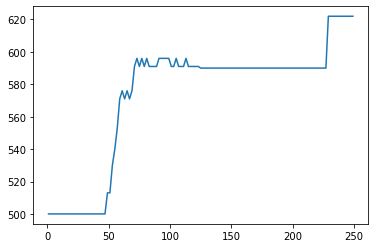

In [640]:
plt.plot(sizes,testErrors)

**Problem 1 Part 3**

In [65]:
#Same code as before, but changed i in the call to 49 and added a sd metric to loop on
size = 1000
testSize = 500
sizes = []
errors = []
testErrors = []
for i in range(500):
    sd = i/100
    trainX,trainY = generate_data(size,sd)
    testX,testY = generate_data(testSize,sd)
    index = [j for j in range(size)]
    testIndex = [j for j in range(testSize)]
    results2,testresults = decision_size2(trainX,trainY,49, index,np.array([1]*size),testX,testY,testIndex,np.array([1]*(testSize)))
    results2 = np.array(results2)
    testresults = np.array(testresults)
    sizes.append(i)
    error = size - sum(abs(trainY+results2)/2)
    errors.append(error)
    testY = np.array(testY)
    testError = size - sum(abs(testY+testresults)/2)
    testErrors.append(testError)

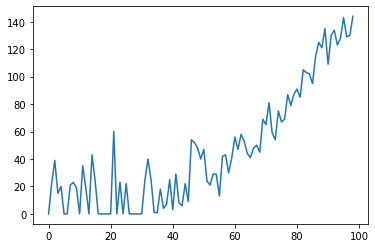

In [69]:
plt.plot(sizes[0:99],errors[0:99])

**Problem 1 Part 4**

In [638]:
def decision_X(array,Y,sampleSize,Index,finalY,testArray,testY,testIndex,testFinalY, Xs):
    array = np.array(array)
    testArray = np.array(testArray)
    Y = np.array(Y)
    if len(array) <= sampleSize: #If size too small, return everything
        return finalY,testFinalY
    else:
        corrs = []
        for i in range(15): #Calculate Correlations
            correl = correlation(len(array),i,Y,array)
            corrs.append(abs(correl))
        if max(corrs) <= 0: #If no correlation, return everthing
            return finalY,testFinalY
        X_index = np.nanargmax(corrs)
        Xs.append(X_index) ##############################################ADDED NEW ARRAY TO TRACK Xs (Used to determine unneccessary Xs)
        
        #Determine average Y depending on whether above or below X
        above = 0
        below = 0
        for i in range(len(array)):
            if array[i][X_index] == 1:
                above = above + Y[i]
            if array[i][X_index] == -1:
                below = below + Y[i]
        
        above = int(above)
        below = int(below)
        
        #Set what Y is for when X is 1
        if above > 0:
            upper = 1
        elif above < 0:
            upper = -1
        else:
            temp = np.random.binomial(1,0.5,1)[0]
            if temp == 0:
                upper = -1
            else:
                upper = 1
        
        #Set what Y is for when X is -1
        if below > 0:
            lower = 1
        elif below < 0:
            lower = -1
        else:
            temp = np.random.binomial(1,0.5,1)[0]
            if temp == 0:
                lower = 1
            else:
                lower = -1
       
        #Applying the model and making parameters to be passed down in regression
        leftArray = []
        leftIndexes = []
        leftY = []
        rightArray = []
        rightIndexes = []
        rightY = []
        for j in range(len(array)):
            if array[j,X_index] == 1:
                rightArray.append(array[j,:])
                rightIndexes.append(Index[j])
                rightY.append(Y[j])
                finalY[Index[j]] = upper
            elif  array[j,X_index] == -1:
                leftArray.append(array[j,:])
                leftIndexes.append(Index[j])
                leftY.append(Y[j])
                finalY[Index[j]] = lower

        #Applying Model to test Data
        testLeftArray = []
        testLeftIndex = []
        testLeftY = []
        testRightArray = []
        testRightIndex = []
        testRightY = []
        for j in range(len(testArray)):
            if testArray[j,X_index] == 1:
                testRightArray.append(testArray[j,:])
                testRightIndex.append(testIndex[j])
                testRightY.append(testY[j])
                testFinalY[testIndex[j]] = upper
            elif  testArray[j,X_index] == -1:
                testLeftArray.append(testArray[j,:])
                testLeftIndex.append(testIndex[j])
                testLeftY.append(testY[j])
                testFinalY[testIndex[j]] = lower

                
                
        decision_X(rightArray,rightY,sampleSize,rightIndexes,finalY,testRightArray,testRightY,testRightIndex,testFinalY,Xs)
        decision_X(leftArray,leftY,sampleSize,leftIndexes,finalY,testLeftArray,testLeftY,testLeftIndex,testFinalY,Xs)
        
    return Xs

In [83]:
#Same code as before, but changed only look at Xs
size = 1000
testSize = 500
sizes = []
unneccessary = []
for i in range(500):
    Xs = []
    sd = i/100
    trainX,trainY = generate_data(size,sd)
    testX,testY = generate_data(testSize,sd)
    index = [j for j in range(size)]
    testIndex = [j for j in range(testSize)]
    Xs = decision_X(trainX,trainY,49, index,np.array([1]*size),testX,testY,testIndex,np.array([1]*(testSize)),Xs)
    unn = 0
    for j in Xs: #Every time a variable over X5 is used, it is counted as unneccessary
        if Xs[j] > 4:
            unn +=1
    
    
    sizes.append(i)
    unneccessary.append(unn)


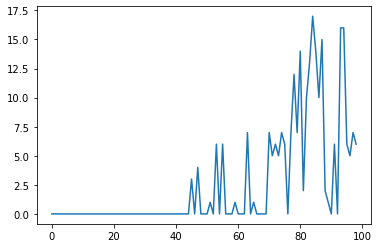

In [90]:
plt.plot(sizes[0:99],unneccessary[0:99])

In [89]:
np.mean(unneccessary[200:])

19.496666666666666

## Part 2: Logistic Regression

In [291]:
def logistic_size(array,Y,sampleSize,Index,finalY,testArray,testY,testIndex,testFinalY):
    array = np.array(array)
    testArray = np.array(testArray)
    Y = np.array(Y)
    if len(array) <= sampleSize: #If size too small, return everything
        if sampleSize == 1:
            return finalY,testFinalY
        else:
            #setting the logistic values for the training data
            totalY = 0
            posY = 0
            for k in Y:
                k = int(k)
                totalY += 1
                if Y[k] == 1:
                    posY += 1
            for t in Index:
                new = posY/totalY
                finalY[t] = float(new)
            for q in testIndex: #setting the logistic values for the testing data
                testFinalY[q] = float(new)
            return finalY,testFinalY
    else:
        corrs = []
        for i in range(15): #Calculate Correlations
            correl = correlation(len(array),i,Y,array)
            corrs.append(abs(correl))
        if max(corrs) <= 0: #If no correlation, return everthing
            if sampleSize == 1:
                return finalY,testFinalY
            else:
                #setting the logistic values for the training data
                totalY = 0
                posY = 0
                for k in Y:
                    k = int(k)
                    totalY += 1
                    if Y[k] == 1:
                        posY += 1
                for t in Index:
                    finalY[t] = posY/totalY
                for q in testIndex: #setting the logistic values for the testing data
                    testFinalY[q] = posY/totalY
                return finalY,testFinalY
        
        X_index = np.nanargmax(corrs)

        
        #Determine average Y depending on whether above or below X
        above = 0
        below = 0
        for i in range(len(array)):
            if array[i][X_index] == 1:
                above = above + Y[i]
            if array[i][X_index] == -1:
                below = below + Y[i]
        
        #Set the percentages
        upper = above/len(Y)
        lower = below/len(Y)
       
        #Applying the model and making parameters to be passed down in regression
        leftArray = []
        leftIndexes = []
        leftY = []
        rightArray = []
        rightIndexes = []
        rightY = []
        for j in range(len(array)):
            if array[j,X_index] == 1:
                rightArray.append(array[j,:])
                rightIndexes.append(Index[j])
                rightY.append(Y[j])
                finalY[Index[j]] = float(upper)
            elif  array[j,X_index] == -1:
                leftArray.append(array[j,:])
                leftIndexes.append(Index[j])
                leftY.append(Y[j])
                finalY[Index[j]] = float(lower)

        #Applying Model to test Data
        testLeftArray = []
        testLeftIndex = []
        testLeftY = []
        testRightArray = []
        testRightIndex = []
        testRightY = []
        for j in range(len(testArray)):
            if testArray[j,X_index] == 1:
                testRightArray.append(testArray[j,:])
                testRightIndex.append(testIndex[j])
                testRightY.append(testY[j])
                testFinalY[testIndex[j]] = upper
            elif  testArray[j,X_index] == -1:
                testLeftArray.append(testArray[j,:])
                testLeftIndex.append(testIndex[j])
                testLeftY.append(testY[j])
                testFinalY[testIndex[j]] = lower

                
                
        logistic_size(rightArray,rightY,sampleSize,rightIndexes,finalY,testRightArray,testRightY,testRightIndex,testFinalY)
        logistic_size(leftArray,leftY,sampleSize,leftIndexes,finalY,testLeftArray,testLeftY,testLeftIndex,testFinalY)
    return finalY,testFinalY

In [331]:
size = 1000
testSize = 500
trainX,trainY = generate_data(size,0.05)
testX,testY = generate_data(testSize,0.05)
trainY = np.array(trainY)
testY = np.array(testY)
trainY = trainY.astype(float)
testY = testY.astype(float)
sizes = []
errors = []
testErrors = []

#Changing -1 to 0 so that you can analyze errors more easily with logistic regression (since all percent values will be between 0 and 1)
temptestY = []
for k in range(500):
    if testY[k] == 1:
        temptestY.append(1)
    else:
        temptestY.append(0)
temptrainY = []
for k in range(1000):
    if trainY[k] == 1:
        temptrainY.append(1)
    else:
        temptrainY.append(0)


for i in range(size):
    if i%2 == 0 or i >= 250:
        continue
    else:
        index = [j for j in range(size)]
        testIndex = [j for j in range(testSize)]
        results2,testresults = logistic_size(trainX,trainY,i, index,np.array([1.0]*size),testX,testY,testIndex,np.array([1.0]*(testSize)))
        results2 = np.array(results2)
        testresults = np.array(testresults)
        sizes.append(i)
        error = sum(abs(temptrainY-results2))
        errors.append(error)
        
        testError = sum(abs(temptestY-testresults))
        testErrors.append(testError)

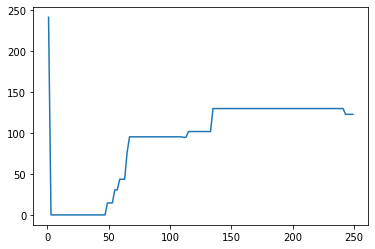

In [346]:
plt.plot(sizes,testErrors)

**Part 2 Question 2/3**

COULDNT FIGURE OUT HOW TO DO

In [505]:
rand = random.seed
rand

<bound method Random.seed of <random.Random object at 0x0000017C8F506C10>>

In [500]:
def SGD(Y,X,m):
    rand = randrange(0-m)
    if m < 0:
        return 1
    w = SGD()

In [514]:
randrange(100)

65

## Part 3: Support Vector Machines

In [429]:
from matplotlib import pyplot as plt, patches

In [541]:
def kernel(x1,x2):
    kern = x1 * -x2 #kernel defined as x1 multiplied by negative x2, which yields the correct result for y
    return kern

In [621]:
def dualSVM(alpha,y,x1,x2,m):
    
    classifiers1 = []
    #finding the classifier for each x1/x2/y value
    for i in range(m):
        sum1 = 0
        sum1 = sum1 + (alpha[i] * y[i] * kernel(x1[i],x2[i]))
        classifiers1.append(np.sign(sum1))
        #print('alpha:',alpha[i])
        #print('y:',y[i])
        #print('kernel:',kernel(x1[i],x2[i]))
        #print(alpha[i] * y[i] * kernel(x1[i],x2[i]))
        #print(sum1)
    return classifiers1 #returns the classifier

In [622]:
x1s = []
x2s = []
ys = []
m = 100
#Create Random Data
for i in range(m):
    s = np.random.normal(0, 1)
    if s > 0:
        x1 = 1
    else:
        x1 = -1

    t = np.random.normal(0, 1)
    if t > 0:
        x2 = 1
    else:
        x2 = -1

    y = np.sign(x1 * -x2)

    x1s.append(x1)
    x2s.append(x2)
    ys.append(y)

#For each alpha above 0, create a classifiers vector
alpha = 0
classifiersByAlpha = []
for j in range(m):
    alpha += 1
    alphas = []
    for i in range(m):
        alphas.append((alpha*ys[i]))
    classifiersByAlpha.append(dualSVM(alphas,ys,x1s,x2s,m))

Text(0.5, 1.0, 'SVM')

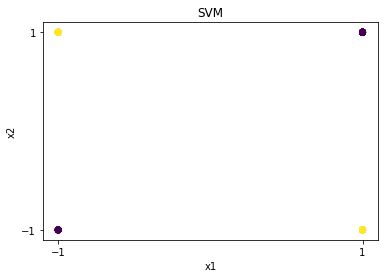

In [636]:
#No matter which alpha is used (as long as it is positive), the classification regions are the same
plt.scatter(x1s,x2s,c=classifiersByAlpha[5])
plt.xticks([-1,1])
plt.yticks([-1,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM')

Text(0.5, 1.0, 'SVM')

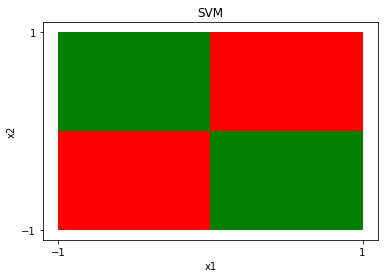

In [637]:
#More visually appealing plot 
figure, ax = plt.subplots(1)
rectangle1 = patches.Rectangle((0, -1), 1, 1,facecolor="green", linewidth=7)
rectangle2 = patches.Rectangle((-1, 0), 1, 1,facecolor="green", linewidth=7)
rectangle3 = patches.Rectangle((-1, -1), 1, 1,facecolor="red", linewidth=7)
rectangle4 = patches.Rectangle((0, 0), 1, 1,facecolor="red", linewidth=7)
ax.plot(c='red')
ax.add_patch(rectangle1)
ax.add_patch(rectangle2)
ax.add_patch(rectangle3)
ax.add_patch(rectangle4)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xticks([-1,1], minor=False)
ax.set_yticks([-1,1], minor=False)
ax.set_title('SVM')